In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_excel("data/ML Assessment Dataset (Bank Data).xlsx")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df["y"].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#data types of the columns

df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Marital

<Axes: xlabel='marital', ylabel='count'>

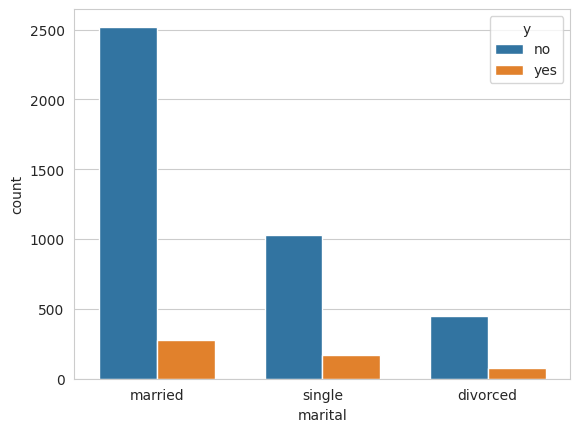

In [7]:
#check loan approval according to gender 

sns.set_style('whitegrid')
sns.countplot(x='marital', hue='y', data=df, width=0.7)

Married people are contacted more but the subscription ratio is comparatively less than single people. Close to 9% of the married people subscribed after they are pitched whereas almost 18-20% single people subscribed when they are pitched. 

I think more single people should be pitched

# Education

<Axes: xlabel='education', ylabel='count'>

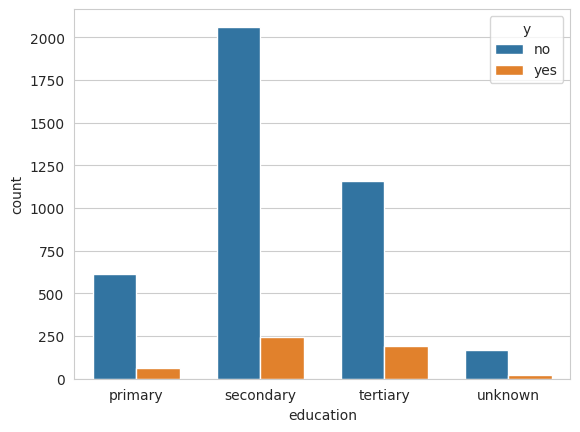

In [8]:
#check loan approval according to gender 

sns.set_style('whitegrid')
sns.countplot(x='education', hue='y', data=df, width=0.7)

People with secondary and tertiary education are most interested in subscription, people with tertiary education have a higher ratio of subscription. 

# Contact

<Axes: xlabel='contact', ylabel='count'>

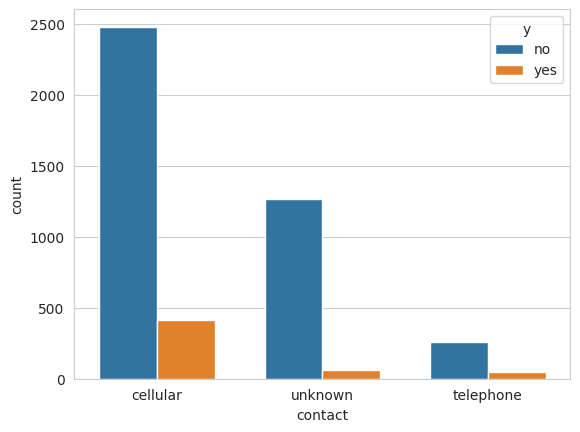

In [9]:
#check loan approval according to gender 

sns.set_style('whitegrid')
sns.countplot(x='contact', hue='y', data=df, width=0.7)

People with whom cellular contact was done, are more likely to subscribe

# Housing

<Axes: xlabel='housing', ylabel='count'>

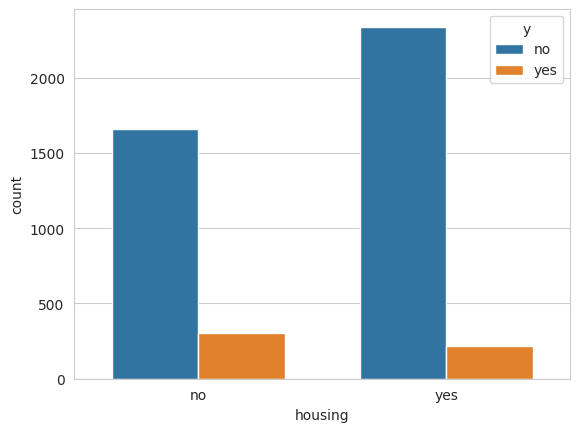

In [10]:
#check loan approval according to gender 

sns.set_style('whitegrid')
sns.countplot(x='housing', hue='y', data=df, width=0.7)

If the customer doesn't have housing loan, then he has a higher possibility of subscribing.

# Loan

<Axes: xlabel='loan', ylabel='count'>

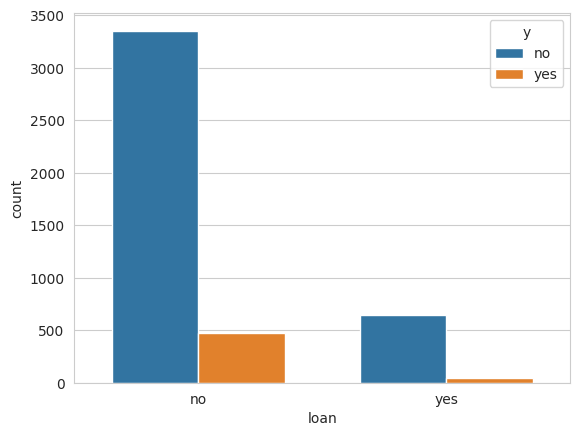

In [11]:
#check loan approval according to gender 

sns.set_style('whitegrid')
sns.countplot(x='loan', hue='y', data=df, width=0.7)

People who doesn't have a personal loan has more tendency to subscribe compared to those who doesn't have personal loan.

# Default

<Axes: xlabel='default', ylabel='count'>

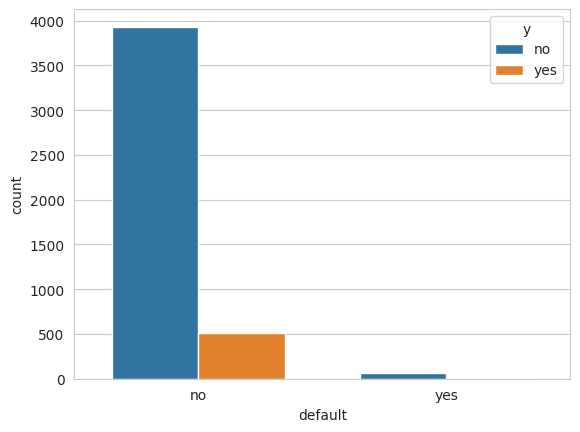

In [12]:
#check loan approval according to gender 

sns.set_style('whitegrid')
sns.countplot(x='default', hue='y', data=df, width=0.7)

Those who have defaulted on credit were the most to included in the dataset, the others number is very less! So, we can remove this as a feature. 

# Month

<Axes: xlabel='month', ylabel='count'>

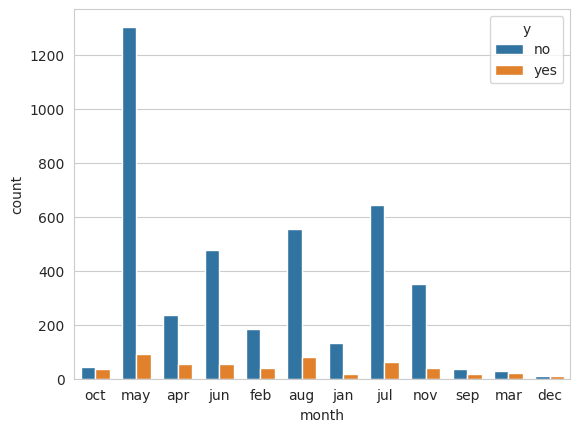

In [13]:

sns.set_style('whitegrid')
sns.countplot(x='month', hue='y', data=df, width=0.7)

It doesn't seem there are any impact of a month on customers subscription. 

<Axes: xlabel='day', ylabel='count'>

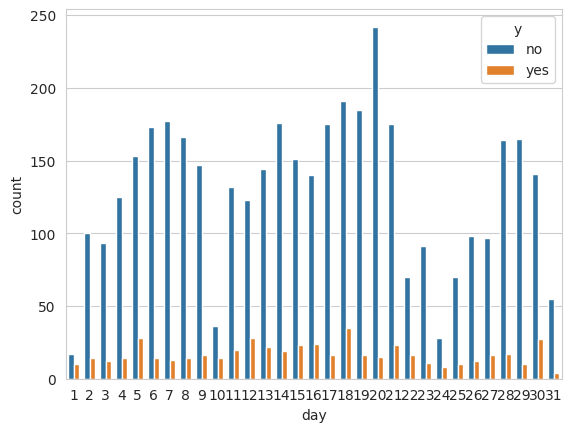

In [14]:

sns.set_style('whitegrid')
sns.countplot(x='day', hue='y', data=df, width=0.7)

The date also seems to not affect the subscription

# Poutcome

<Axes: xlabel='poutcome', ylabel='count'>

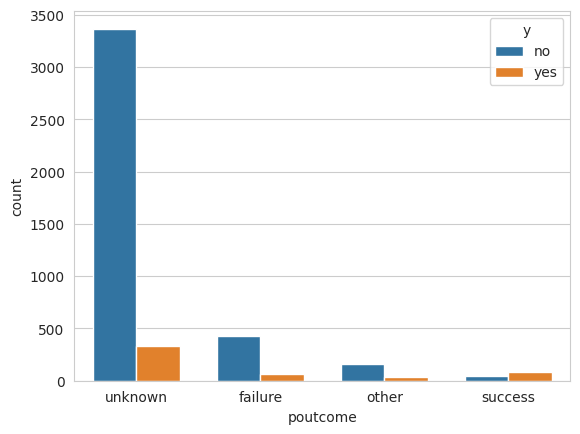

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='poutcome', hue='y', data=df, width=0.7)

Most of the data are unknown. A very less number of data are available which indicates that if the last campaign was a success, it is very likely for the customer to subscribe, but if the last campaign was a failure, it is likely for the user to not subscribe. But, as most of the data are unknown, we are not going to use this feature.

<Axes: xlabel='pdays', ylabel='count'>

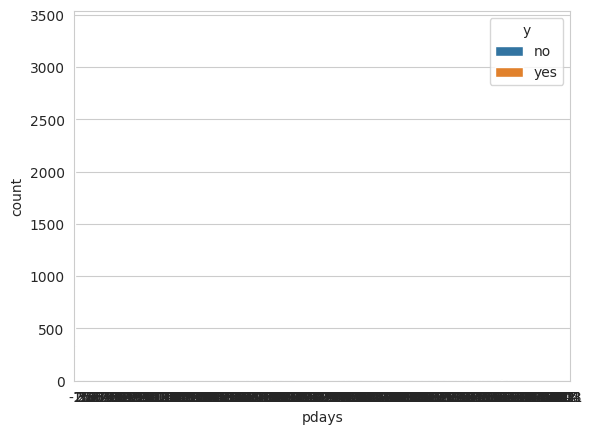

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='pdays', hue='y', data=df, width=0.7)

In [17]:
df[df["pdays"]==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


Looks like most of the customers (3705) (82%) were not contacted before. So, this feature might not impact the performance. We're dropping this feature

In [18]:
df["previous"].value_counts()

previous
0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
20       1
18       1
13       1
19       1
15       1
24       1
17       1
22       1
23       1
25       1
Name: count, dtype: int64

This is the same feature as Pdays, so we are not using this feature as it is of less significance

# Job

In [19]:
df[df["y"]=="yes"]["job"].reset_index(drop=True).value_counts()

job
management       131
technician        83
blue-collar       69
admin.            58
retired           54
services          38
self-employed     20
student           19
entrepreneur      15
housemaid         14
unemployed        13
unknown            7
Name: count, dtype: int64

In [20]:
58/521

0.11132437619961612

People who have subscribed, most of them were related to management jobs (25%), 15% were technicians, 13% had blue-collar jobs, 11% were admins and 10% were retired persons. 

In [21]:
df[df["y"]=="no"]["job"].reset_index(drop=True).value_counts()

job
blue-collar      877
management       838
technician       685
admin.           420
services         379
retired          176
self-employed    163
entrepreneur     153
unemployed       115
housemaid         98
student           65
unknown           31
Name: count, dtype: int64

Most rejection of subscription was done by blue colar job holders, management employees and technicians.

# Categorical Variables convert

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
df["contact_encoded"] = le.fit_transform(df["contact"])

In [25]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,contact_encoded
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,2
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,2
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0


In [26]:
df["job_encoded"] = le.fit_transform(df["job"])

In [27]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,contact_encoded,job_encoded
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,10
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,7
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,4
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,2,4
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0,7
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,2,6
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0,9
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0,1


In [28]:
df["marital_encoded"] = le.fit_transform(df["marital"])

In [29]:
df["education_encoded"] = le.fit_transform(df["education"])

In [30]:
df["default_encoded"] = le.fit_transform(df["default"])

In [31]:
df["housing_encoded"] = le.fit_transform(df["housing"])

In [32]:
df["loan_encoded"] = le.fit_transform(df["loan"])

In [33]:
df["month_encoded"] = le.fit_transform(df["month"])

In [34]:
df["poutcome_encoded"] = le.fit_transform(df["poutcome"])

In [35]:
df["y_encoded"] = le.fit_transform(df["y"])

In [36]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_encoded,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,month_encoded,poutcome_encoded,y_encoded
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,10,1,0,0,0,0,10,3,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,7,1,1,0,1,1,8,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,4,2,2,0,1,0,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,2,4,1,2,0,1,1,6,3,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,2,1,1,1,0,1,0,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,0,7,1,1,0,1,0,5,3,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,2,6,1,2,1,1,1,8,3,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,0,9,1,1,0,0,0,1,3,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,0,1,1,1,0,0,0,3,1,0


In [37]:
df = df.drop(["job","marital","education","default","housing","loan","contact","month","poutcome","y"],axis=1)

In [38]:
df

,age,balance,day,duration,campaign,pdays,previous,contact_encoded,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,month_encoded,poutcome_encoded,y_encoded
0,30,1787,19,79,1,-1,0,0,10,1,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,0,7,1,1,0,1,1,8,0,0
2,35,1350,16,185,1,330,1,0,4,2,2,0,1,0,0,0,0
3,30,1476,3,199,4,-1,0,2,4,1,2,0,1,1,6,3,0
4,59,0,5,226,1,-1,0,2,1,1,1,0,1,0,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,7,1,1,0,1,0,5,3,0
4517,57,-3313,9,153,1,-1,0,2,6,1,2,1,1,1,8,3,0
4518,57,295,19,151,11,-1,0,0,9,1,1,0,0,0,1,3,0
4519,28,1137,6,129,4,211,3,0,1,1,1,0,0,0,3,1,0


In [39]:
df["y_encoded"].value_counts()

y_encoded
0    4000
1     521
Name: count, dtype: int64

# Balance

<Axes: >

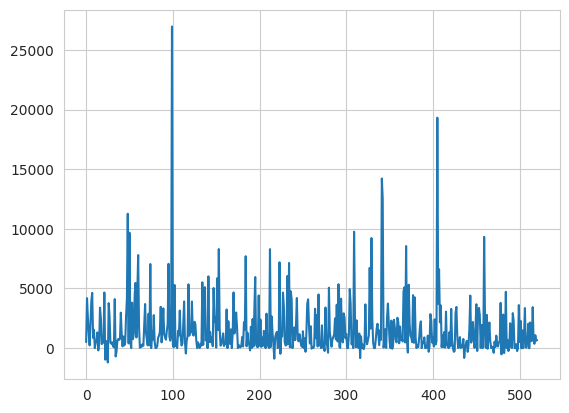

In [40]:
df[df["y_encoded"]==1]["balance"].reset_index(drop=True).plot()

<Axes: >

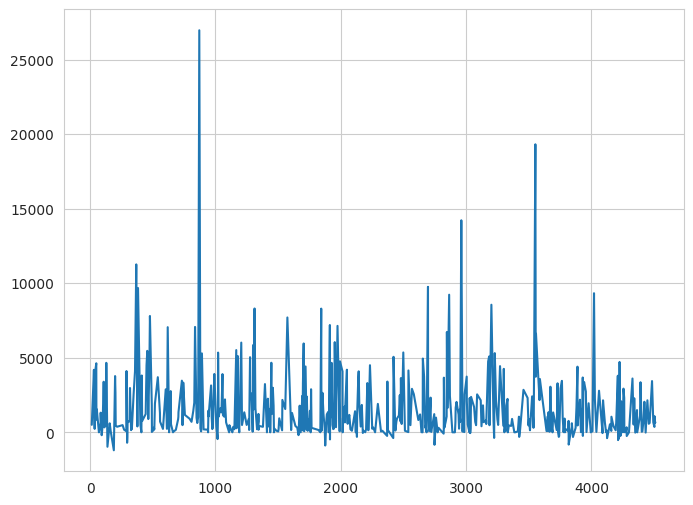

In [41]:
plt.figure(figsize=(8, 6))
df[df["y_encoded"]==1]["balance"].plot()

In [42]:
df[df["balance"]>5000]

,age,balance,day,duration,campaign,pdays,previous,contact_encoded,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,month_encoded,poutcome_encoded,y_encoded
10,39,9374,20,273,1,-1,0,2,7,1,1,0,1,0,8,3,0
25,41,5883,20,182,2,-1,0,0,4,1,2,0,0,0,9,3,0
40,38,11971,17,609,2,101,3,2,4,2,2,0,1,0,9,0,0
62,48,5887,13,227,2,-1,0,0,4,1,2,0,0,0,1,3,0
64,56,16873,7,223,1,-1,0,0,0,1,1,0,0,0,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,38,12877,17,118,3,-1,0,2,4,1,2,0,0,0,6,3,0
4451,55,6880,8,353,2,-1,0,0,4,1,2,0,0,0,1,3,0
4453,35,5304,20,340,1,183,2,0,1,1,1,0,1,0,9,0,0
4457,37,6969,20,412,1,-1,0,2,1,2,0,0,1,0,8,3,0


In [43]:
pd.DataFrame(df[df["y_encoded"]==1]["balance"]>5000).value_counts()

balance
False      487
True        34
Name: count, dtype: int64

In [44]:
(34/309)*100

11.003236245954692

34 customers (11%) out of 309 who were pitched who have an yearly balance of more than 5000, have subscribed.

In [45]:
pd.DataFrame(df[df["y_encoded"]==0]["balance"]>5000).value_counts()

balance
False      3725
True        275
Name: count, dtype: int64

In [46]:
(275/309)*100

88.9967637540453

88% customers did not subscribe who have an yearly balance of more than 5000. 

So, we should target customers who have an income of less than 5000 EUR

# Campaign

In [47]:
df["campaign"].value_counts()

campaign
1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
24       3
28       3
20       3
19       3
32       2
23       2
21       2
22       2
29       1
30       1
50       1
31       1
44       1
Name: count, dtype: int64

In [48]:
df[(df["campaign"]==1) & (df["y_encoded"]==1)]

,age,balance,day,duration,campaign,pdays,previous,contact_encoded,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,month_encoded,poutcome_encoded,y_encoded
13,20,502,30,261,1,-1,0,0,8,2,1,0,0,0,0,3,1
36,78,229,22,97,1,-1,0,1,5,0,0,0,0,0,10,3,1
37,32,2089,14,132,1,-1,0,0,1,1,1,0,1,0,9,3,1
38,33,3935,6,765,1,342,2,0,4,1,1,0,1,0,8,0,1
49,61,4629,27,181,1,92,1,0,0,1,3,0,1,0,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,83,1097,5,181,1,-1,0,1,5,0,0,0,0,0,7,3,1
4416,32,811,14,563,1,-1,0,0,1,2,1,0,1,0,8,3,1
4423,45,2048,18,310,1,804,1,0,4,2,2,0,1,0,10,0,1
4433,40,-17,11,474,1,256,1,0,4,1,2,0,1,1,8,2,1


240 out of 521 (46%) of customers subscribed when only 1 contact was made

In [49]:
df[(df["campaign"]==2) & (df["y_encoded"]==1)]

,age,balance,day,duration,campaign,pdays,previous,contact_encoded,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,month_encoded,poutcome_encoded,y_encoded
30,68,4189,14,897,2,-1,0,1,5,0,1,0,0,0,5,3,1
70,37,0,16,268,2,182,3,0,4,1,2,0,0,0,5,2,1
83,52,657,7,398,2,460,2,1,7,1,1,0,0,0,5,0,1
115,25,505,17,386,2,-1,0,0,9,2,1,0,0,1,9,3,1
164,28,80,20,676,2,146,2,0,4,2,2,0,0,0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,53,15,20,921,2,-1,0,0,4,1,2,0,0,0,1,3,1
4300,59,0,5,493,2,-1,0,0,5,1,0,0,0,0,6,3,1
4402,41,39,21,549,2,-1,0,0,2,1,0,0,1,0,9,3,1
4447,49,2146,7,1516,2,353,2,0,1,2,0,0,1,0,8,1,1


138 customers (26%) subscribed when got called twice

In [50]:
len(df[(df["campaign"]==3) & (df["y_encoded"]==1)])

57

57 customers (10%) subscribed when got called a 3rd time.

In [51]:
len(df[(df["campaign"]==4) & (df["y_encoded"]==1)])

43

43 customers (8%) subscribed when got called 4th time.

That means after 3 calls we got 46+26+10 = 82% customers when we make 3 calls. If we want to get 90% customers, the maximum we can do is 4 calls. And that is I think enough. More than that would be a waste. 

# Dropping unccessary features

From EDA, we have determined that the features - default, month, day, poutcome, pdays - are quite unncessary as it is not affecting performance. We're going to drop these columns.

In [52]:
df

,age,balance,day,duration,campaign,pdays,previous,contact_encoded,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,month_encoded,poutcome_encoded,y_encoded
0,30,1787,19,79,1,-1,0,0,10,1,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,0,7,1,1,0,1,1,8,0,0
2,35,1350,16,185,1,330,1,0,4,2,2,0,1,0,0,0,0
3,30,1476,3,199,4,-1,0,2,4,1,2,0,1,1,6,3,0
4,59,0,5,226,1,-1,0,2,1,1,1,0,1,0,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,7,1,1,0,1,0,5,3,0
4517,57,-3313,9,153,1,-1,0,2,6,1,2,1,1,1,8,3,0
4518,57,295,19,151,11,-1,0,0,9,1,1,0,0,0,1,3,0
4519,28,1137,6,129,4,211,3,0,1,1,1,0,0,0,3,1,0


In [53]:
df_refined = df.drop(["default_encoded","month_encoded","day","poutcome_encoded","pdays"],axis=1)

# Correlation

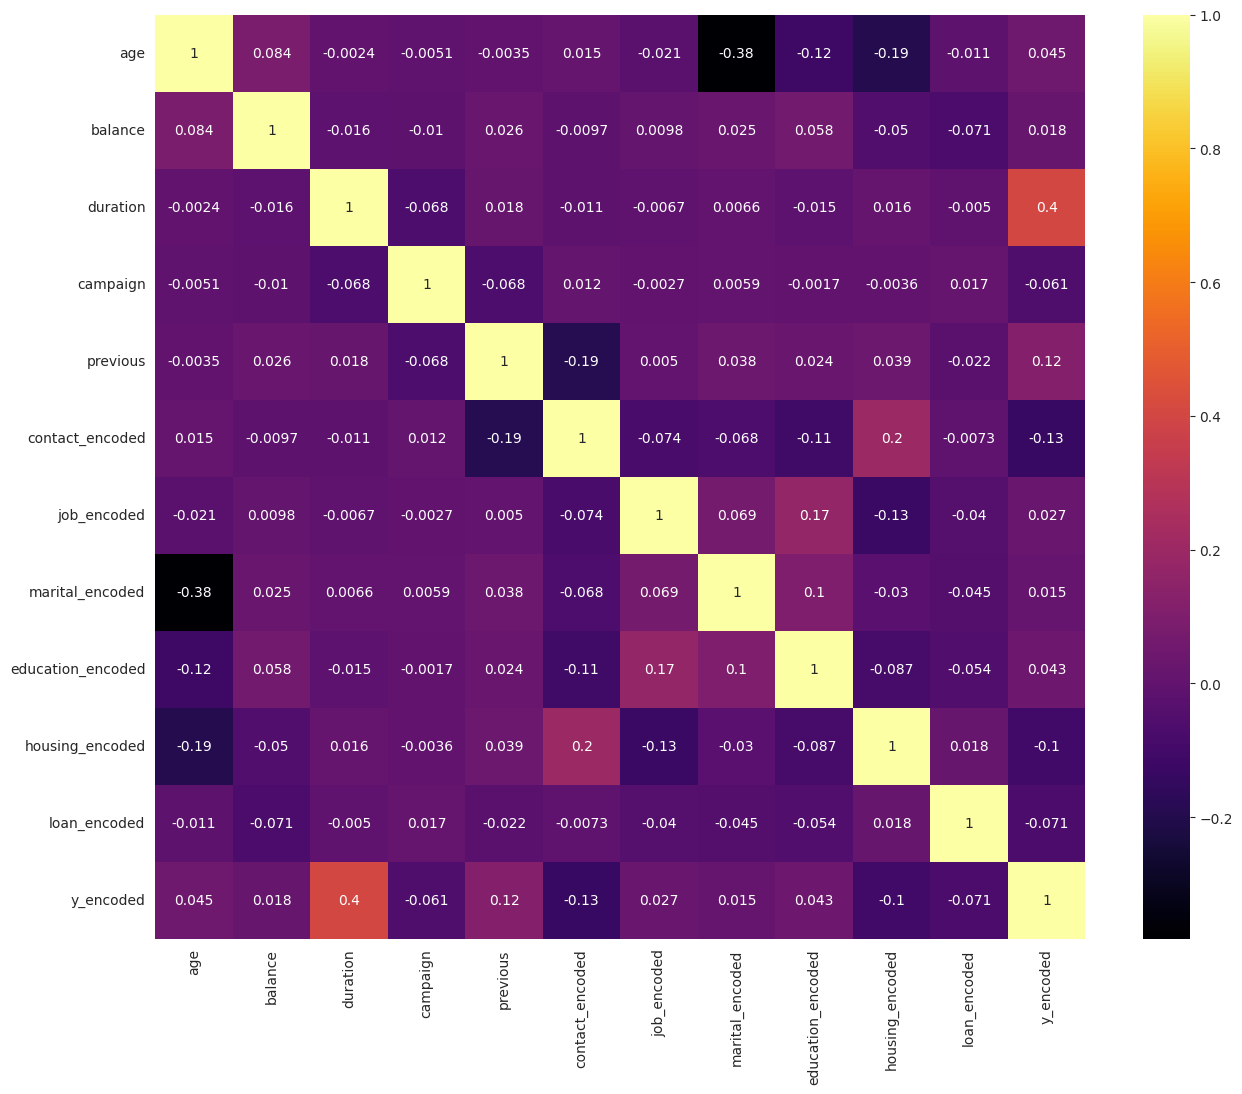

In [54]:
plt.figure(figsize=(15,12))
sns.heatmap(df_refined.corr(), annot=True, cmap='inferno');

Train Test split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = df_refined.drop(["y_encoded"],axis=1)
y = df_refined["y_encoded"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3616, 11), (3616,), (905, 11), (905,))

# Classification using Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

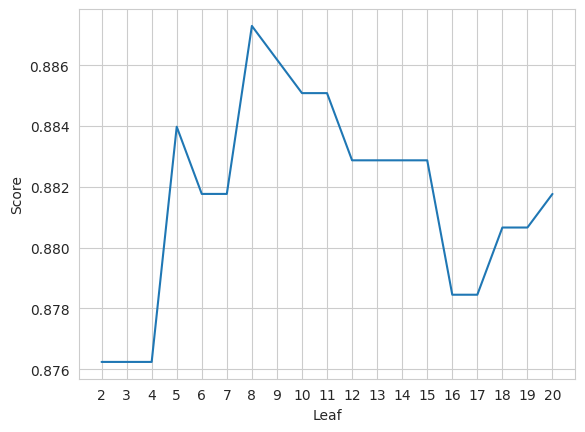

Decision Tree Accuracy: 88.73%


In [60]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

For max_leaf_nodes value 8, decision tree performed the best. So, we're gonna use this hyperparameter

In [61]:
dt = DecisionTreeClassifier(max_leaf_nodes=8)

In [62]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

In [63]:
y_pred = dt.predict(X_test)

In [64]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       813
           1       0.46      0.55      0.50        92

    accuracy                           0.89       905
   macro avg       0.70      0.74      0.72       905
weighted avg       0.90      0.89      0.89       905



This report reflects that our model cannot properly classify the 1 class as it is the minority class with less examples in the training data. Also the test examples are very less, so based on this little amount of test data, we cannot really determine the performance of our model.

In [65]:
print(confusion_matrix(y_test, y_pred))

[[752  41]
 [ 61  51]]


Confusion matrix shows that our model cannot falsely predicts 0 class as 1 for 41 times (false negative). And it falsely predicts 1 class as 0 for 61 times (false positive).

# save model

In [68]:
import pickle 

with open("decision_tree_model.pkl","wb") as fp:
    pickle.dump(dt,fp)

# Classification with Naive Bayes

In [68]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

In [69]:
NB1 = GaussianNB()
NB1.fit(X_train, y_train)

GaussianNB()

In [70]:
y_pred = NB1.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       793
           1       0.47      0.46      0.46       112

    accuracy                           0.87       905
   macro avg       0.70      0.69      0.69       905
weighted avg       0.87      0.87      0.87       905



The same problem can be seen here. Minority class prediction is not very well. It is due to the imbalance in the dataset

In [72]:
print(confusion_matrix(y_test, y_pred))

[[735  58]
 [ 61  51]]


False negatives are higher!! 58 examples out of 109 are false flags for 1 class thus giving poor precision and recall. 

# Decision tree performed better than naive bayes in this case, both got 61 false positives, but decision tree got 41 false negatives whereas naive bayes got 58 thus making DT better in this case

# Feature importance

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [74]:
print(model.feature_importances_)

[0.13476332 0.11473671 0.31128586 0.07907757 0.07831852 0.03336537
 0.08700448 0.05457964 0.06112707 0.02544202 0.02029945]


# Using SMOTE over sampling to balance the dataset

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
sm = SMOTE()

In [107]:
#before balancing 
y.value_counts()

y_encoded
0    4000
1     521
Name: count, dtype: int64

In [108]:
X_over,y_over = sm.fit_resample(X,y)

In [109]:
#after balancing
y_over.value_counts()

y_encoded
0    4000
1    4000
Name: count, dtype: int64

Now repeating all the training steps again

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 0)

In [111]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6400, 11), (6400,), (1600, 11), (1600,))

In [87]:
dt = DecisionTreeClassifier(max_leaf_nodes=8)

In [88]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

In [89]:
y_pred = dt.predict(X_test)

In [90]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       944
           1       0.72      0.88      0.79       656

    accuracy                           0.81      1600
   macro avg       0.81      0.82      0.81      1600
weighted avg       0.82      0.81      0.81      1600



In [91]:
print(confusion_matrix(y_test, y_pred))

[[720  82]
 [224 574]]


There is a balanced accuracy between 0 and 1 class. But as we can see, the false negative and false positives has not decreased from what it was before and infact the false positives have increased. Also, over sampling adds synthetic data that cannot be trusted fully. Let's try under sampling

In [112]:
NB1 = GaussianNB()
NB1.fit(X_train, y_train)

GaussianNB()

In [113]:
y_pred = NB1.predict(X_test)

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.61      0.72       802
           1       0.70      0.93      0.80       798

    accuracy                           0.77      1600
   macro avg       0.80      0.77      0.76      1600
weighted avg       0.80      0.77      0.76      1600



In [115]:
print(confusion_matrix(y_test, y_pred))

[[488 314]
 [ 59 739]]


# Naive bayes performed well for the 0 class, but performed extremely poor for the 1 class. 314 false negatives. If we do comparison, DT is better

# Under sampling technique

In [93]:
y.value_counts()

y_encoded
0    4000
1     521
Name: count, dtype: int64

In [94]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_under, y_under = cc.fit_resample(X, y)

/home/asifmahmud/miniconda3/envs/blockstak/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [95]:
y_under.value_counts()

y_encoded
0    521
1    521
Name: count, dtype: int64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 0)

In [97]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((833, 11), (833,), (209, 11), (209,))

In [98]:
dt = DecisionTreeClassifier(max_leaf_nodes=8)

In [99]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

In [100]:
y_pred = dt.predict(X_test)

In [101]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        82
           1       0.89      0.80      0.84       127

    accuracy                           0.82       209
   macro avg       0.81      0.82      0.81       209
weighted avg       0.83      0.82      0.82       209



In [102]:
print(confusion_matrix(y_test, y_pred))

[[ 70  26]
 [ 12 101]]


There is a little increase in accuracy, precision and recall. But there are too less examples to train and also a very little amount of data for testing. So, this accuracy does not guarantee a really bad or good performance in the real world! We need more data!!

In [103]:
NB1 = GaussianNB()
NB1.fit(X_train, y_train)

GaussianNB()

In [104]:
y_pred = NB1.predict(X_test)

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        96
           1       0.88      0.84      0.86       113

    accuracy                           0.85       209
   macro avg       0.85      0.85      0.85       209
weighted avg       0.85      0.85      0.85       209



In [106]:
print(confusion_matrix(y_test, y_pred))

[[83 13]
 [18 95]]


# Looks like naive bayes worked better than decision tree for under sampling technique but it is very risky to take decisions on a model trained with under sampled data, it might not work well in the real world data